# Manipulate data using pandas

## Import packages

In [169]:
import pandas as pd
import seaborn as sns

## Loading datasets

Pandas is able to load data from a wide range of format:
- From RAM using dictionaries
- From CSV files using `read_csv`
- From XML files using `read_xml`
- From HTML files using `read_html`
...

In [305]:
ship_flag = pd.read_csv("data/ship_flag.csv")
ship_sunk = pd.read_csv("data/ship_sunk.csv")

In [320]:
# Load data from CSV
df = pd.read_csv("data/ship_flag.csv")

# Load data from RAM
df = pd.DataFrame({"column_1": [1, 2, 3], "column_2": [2, 3, 1], "column_3": ["value_1", "value_2", "value_2"]}, index=["index_1", "index_2", "index_3"])

**Exercice**: Load the two datasets in `data/ship_flag.csv` and in `data/ship_sunk.csv` and store them in the variable `ship_flag` and `ship_sunk`.

## Analyzing data

### Columns and indexes
The columns and the index can be accessed as attributes, as a class `Index`.

In [47]:
# Access the columns
print(df.columns)

# Access the index
print(df.index)

Index(['column_1', 'column_2', 'column_3'], dtype='object')
Index(['index_1', 'index_2', 'index_3'], dtype='object')


Indexes can be set using the method `set_index`.

In [48]:
df.set_index("column_1")

,column_2,column_3
column_1,,
1,2,value_1
3,3,value_2
1,1,value_2


**Exercice**: 
1. Print the columns and the indexes of the two dataframes in `ship_flag` and in `ship_flunk`.
2. Set the ship name as the index for the two dataframes `ship_flag` and `ship_sunk`.
3. Using the method `shape` give the number of rows and columns in each dataframe.

### Accessing columns and rows

One of the strength of pandas is the **easy manipulation of data**.

On a row basis, data can be accessed by row index or by location.

In [49]:
# First row by index range
df.iloc[0]
# Also first row by index name
df.loc["index_1"]

column_1          1
column_2          2
column_3    value_1
Name: index_1, dtype: object

Columns can be accessed by name.

In [50]:
# Access as a series 
df["column_1"]
# Access several columns at the same time
df[["column_1", "column_2"]]
# Access using both rows and column index
print(df.loc["index_1", 'column_1'])

1


Data can be filtered using boolean filters, based on conditions.

In [51]:
# Filter on the serie
df.column_1[df.column_1 > 1]

# Filter on the dataframe
df[df.column_3 == "value_1"]

# Group conditions
df.column_1[(df.column_1 > 1) & (2 > df.column_2)]

Series([], Name: column_1, dtype: int64)

**Exercice**:
1. Extract the columns `Flag` from the dataframe `ship_flag`.
2. List all the sunk ships flying the United States flag.
3. Using the dataframe `ship_sunk`, return the year the `Globe Star` ship was sunk.
5. **Bonus**: return all the name of the ships that start with an M.

### Statistics and aggregation
Statistics can be easily computed using pandas. The method `describe` provides all standard estimators (on **quantitative** data), which can also be computed separately using the corresponding method.

In [41]:
df.describe()
df.column_1.mean()

2.0

For **categorical** data, you should use `value_counts`. You can access

In [220]:
df.column_3.unique()

array(['value_1', 'value_2'], dtype=object)

In [42]:
df.column_3.value_counts()

column_3
value_1    1
value_2    1
Name: count, dtype: int64

Data can be grouped on a per column basis to compute the statistics.

In [81]:
df.groupby(["column_3"]).mean()

,column_1,column_2
column_3,,
value_1,1.0,2.0
value_2,2.0,2.0


**Exercice**:
1. Give the number of distinct flags.
2. Provide the number of ship sunk by flag. Which is the flag with the highest count of sunk ship ?
3. Give the number of ship sunk after 1900. 

### Merging datasets
Often, our data needs to be merged to combine information within several datasets.

In [322]:
# Create additional data to be merged
df_1 = pd.DataFrame({"column_1": [1, 2, 3], "column_4": [1, 3, 1]}, index=["index_1", "index_2", "index_3"])

# Merge based on a common column
merged_data = pd.merge(df, df_1, on='column_1')

# Different types of joins
merged_inner = pd.merge(df, df_1, on='column_1', how='inner')
merged_left = pd.merge(df, df_1, on='column_1', how='left')
merged_right = pd.merge(df, df_1, on='column_1', how='right')
merged_outer = pd.merge(df, df_1, on='column_1', how='outer')

# Merge on index
merged_on_indices = pd.merge(df, df_1, left_index=True, right_index=True)


**Exercice**:
1. For each of the merges, print the result and understand it.
2. Perform two different merges on the dataset `ship_flag` and `ship_sunk` on the Ship column:
    1. Keeping only ships with a sunk year
    2. Keeping all data

## Data vizualization using seaborn
The standard Python library for plotting is `matplotlib`, and seaborn is a wrapper around it that enables easy integration with pandas dataframe.

Most plots are integrated within the library, using the following syntax:
- x: Value of x axis
- y: Value of y axis
- data: pandas DataFrame

[Text(0, 0, 'value_1'), Text(1, 0, 'value_2')]

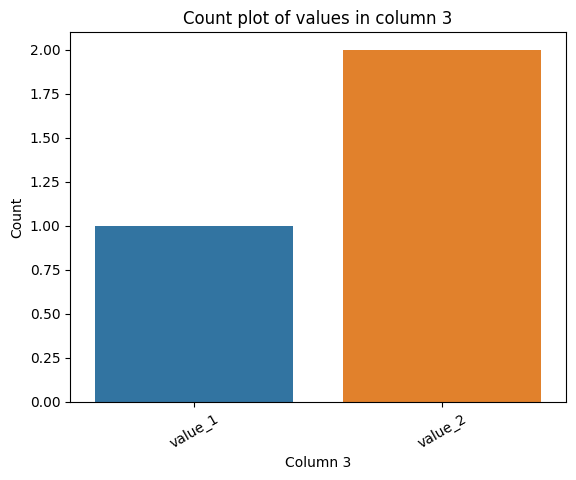

In [306]:
# Create a count plot with the proper x and y title
g = sns.countplot(x="column_3", data=df)
g.set_xlabel("Column 3")
g.set_ylabel("Count")
g.set_title("Count plot of values in column 3")

# Rotate x labels (is handy when you have a lot of x data)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Text(0.5, 1.0, 'Scatter plot of column 1 and column 2')

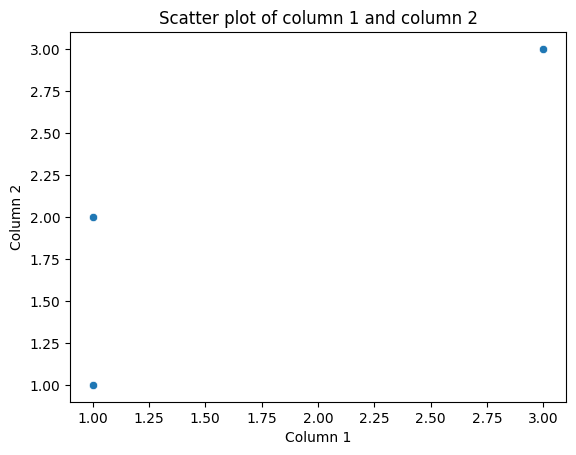

In [307]:
# Create a scatter plot
g = sns.scatterplot(x="column_1", y="column_2", data=df)
g.set_xlabel("Column 1")
g.set_ylabel("Column 2")
g.set_title("Scatter plot of column 1 and column 2")

**Exercice**:
1. Plot for the 10 flags with the highest count of wrecks the number of ship wrecks.
2. Plot per year in the 21th century the number of shipwrecks.